In [1]:
%load_ext rpy2.ipython

In [9]:
%%R -o featdata.all -o featdata.lud

library('gridGraphics')
#library('cowplot')
source('./analysis_tools/kiviat_plotter.R')
load('./analysis_tools/newfeat.Rdf')
source('./analysis_tools/restructure_aiwc_data.R')

featdata.all <- drop_metrics_for_simple_kiviat(featdata.all)
featdata.kmeans <- subset(featdata.all,application=="kmeans")
featdata.lud    <- subset(featdata.all,application=="lud")
featdata.csr    <- subset(featdata.all,application=="csr")
featdata.fft    <- subset(featdata.all,application=="fft")
featdata.gem    <- subset(featdata.all,application=="gem")
featdata.dwt    <- subset(featdata.all,application=="dwt")
featdata.srad   <- subset(featdata.all,application=="srad")
featdata.bfs    <- subset(featdata.all,application=="bfs")
featdata.hmm    <- subset(featdata.all,application=="hmm")
featdata.nw     <- subset(featdata.all,application=="nw")
featdata.crc    <- subset(featdata.all,application=="crc")

#source('./analysis_tools/stacked_features.R')


#Reproducibility -- Rebuild figures in the paper

Starting with the Kiviat diagrams, LUD Perimeter

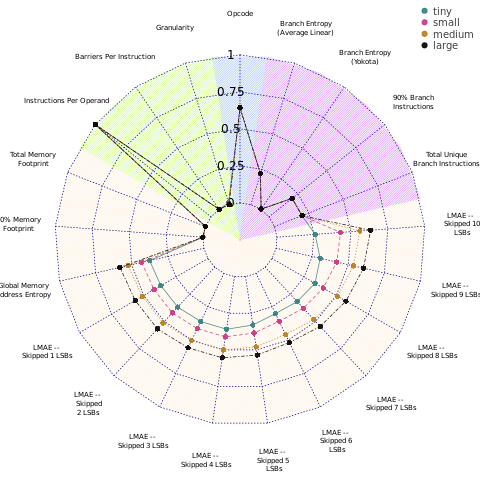

In [10]:
%%R -i featdata.lud featdata.all

x <- reorder_and_subset(featdata=featdata.lud,size='tiny',kernel="lud_perimeter")
x <- data.frame(t(colMeans(x)))
y <- x
x <- reorder_and_subset(featdata=featdata.lud,size='small',kernel="lud_perimeter")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)
x <- reorder_and_subset(featdata=featdata.lud,size='medium',kernel="lud_perimeter")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)
x <- reorder_and_subset(featdata=featdata.lud,size='large',kernel="lud_perimeter")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)

nv <- subset(reorder_features(featdata.all),select=-c(size,kernel,application,invocation))
plot_kiviat(y,nv,colour="black",colour_spokes=TRUE,all_sizes=TRUE)

Selected AIWC metrics of the Lower-Upper Decomposition Internal kernel is shown below

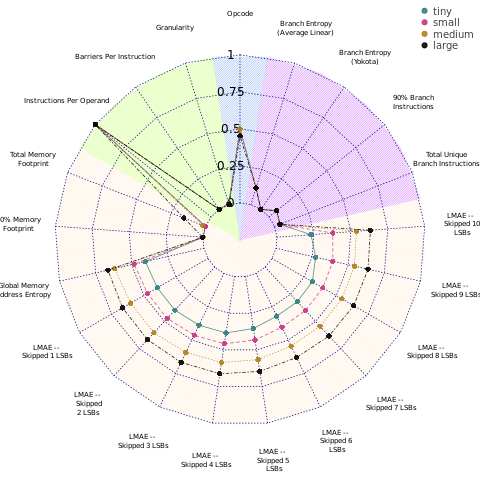

In [11]:
%%R -i featdata.lud

x <- reorder_and_subset(featdata=featdata.lud,size='tiny',kernel="lud_internal")
x <- data.frame(t(colMeans(x)))
y <- x
x <- reorder_and_subset(featdata=featdata.lud,size='small',kernel="lud_internal")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)
x <- reorder_and_subset(featdata=featdata.lud,size='medium',kernel="lud_internal")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)
x <- reorder_and_subset(featdata=featdata.lud,size='large',kernel="lud_internal")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)

plot_kiviat(y,nv,colour="black",colour_spokes=TRUE,all_sizes=TRUE)

The LUD Diagonal kernel AWIC metrics are listed below

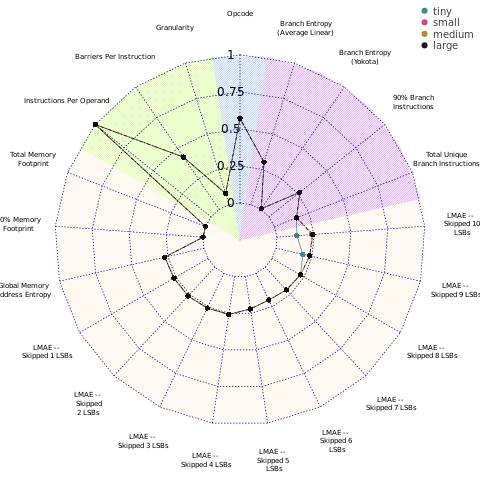

In [12]:
%%R -i featdata.lud

x <- reorder_and_subset(featdata=featdata.lud,size='tiny',kernel="lud_diagonal")
x <- data.frame(t(colMeans(x)))
y <- x
x <- reorder_and_subset(featdata=featdata.lud,size='small',kernel="lud_diagonal")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)
x <- reorder_and_subset(featdata=featdata.lud,size='medium',kernel="lud_diagonal")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)
x <- reorder_and_subset(featdata=featdata.lud,size='large',kernel="lud_diagonal")
x <- data.frame(t(colMeans(x)))
y <- rbind(y,x)

plot_kiviat(y,nv,colour="black",colour_spokes=TRUE,all_sizes=TRUE)

A closer examination of the Local Memory Access Entropy (LMAE) is presented with the following figure.

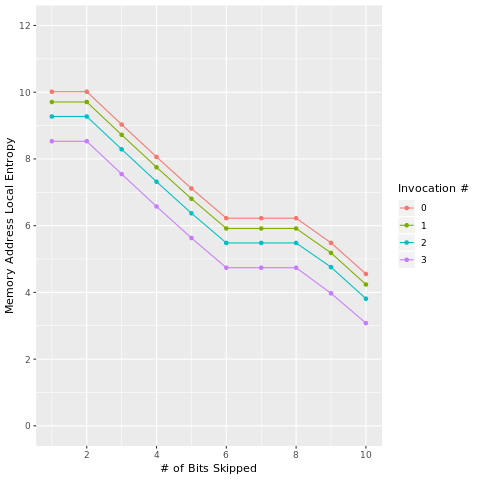

In [13]:
%%R -i featdata.lud

x <- featdata.lud[featdata.lud$size=='tiny' & featdata.lud$kernel == 'lud_perimeter',]
df <- data.frame()
for (invocation in unique(x$invocation)){
    y <- x[x$invocation==invocation,]
    lmae.lsbs <- c()
    lmae.entropy <- c()
    for (i in seq(1,10)){
        lmae.lsbs <- c(lmae.lsbs, i)
        lmae.entropy <- c(lmae.entropy, y[which(y$metric == paste("local memory address entropy -- ",i," LSBs skipped",sep='')),]$count)
    }
    df <- rbind(df, data.frame(invocation=invocation,lsbs=lmae.lsbs,entropy=lmae.entropy))
}
library(ggplot2)
df_plot <- ggplot(dat=df,aes(x=lsbs,y=entropy,colour=invocation)) +
    geom_line() +
    geom_point() +
    labs(x = "# of Bits Skipped", y = "Memory Address Local Entropy", colour="Invocation #") +
    scale_y_continuous(breaks=seq(0,12,by=2),limit=c(0,12)) +
    scale_x_continuous(breaks=seq(0,10,by=2))
df_plot

Finally, the figure showing the selection of 4 AIWC metrics over Extended OpenDwarfs kernels is presented below.

In [19]:
%%R -i featdata.all

full_dat <- reorder_features(featdata.all)

#min-max normalization
normalize <- function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}

full_dat$opcode <- normalize(full_dat$opcode)
full_dat$barriers_per_instruction <- normalize(full_dat$barriers_per_instruction)
full_dat$global_memory_address_entropy <- normalize(full_dat$global_memory_address_entropy)
full_dat$branch_entropy_average_linear <- normalize(full_dat$branch_entropy_average_linear)

group.colours <- c(rgb(100, 149, 237, 127, maxColorValue=255),#compute category (cornflowerblue)
                   rgb(173, 255,  47, 127, maxColorValue=255),#parallelism (greenyellow)
                   rgb(255, 228, 196, 255, maxColorValue=255),#memory (bisque)
                   rgb(191,  62, 255, 127, maxColorValue=255))#branch (darkorchid1)

y <- data.frame()

for(j in unique(full_dat$kernel)){
    for(i in unique(full_dat$size)){
        x <- subset(full_dat, kernel == j & size == i)
        if(nrow(x) == 0){
            next
        }

        y <- rbind(y,
                   data.frame('kernel'=j,
                              'size'=i,
                              'metric'='Opcode',
                              'value'=median(x$opcode)),
                   data.frame('kernel'=j,
                              'size'=i,
                              'metric'='Barriers Per Instruction',
                              'value'=median(x$barriers_per_instruction)),
                   data.frame('kernel'=j,
                              'size'=i,
                              'metric'='Global Memory Address Entropy',
                              'value'=median(x$global_memory_address_entropy)),
                   data.frame('kernel'=j,
                              'size'=i,
                              'metric'='Branch Entropy (Linear Average)',
                              'value'=median(x$branch_entropy_average_linear)))
    }
}

for(s in c('tiny','small','medium','large')){
    z <- subset(y,size==s)

    p <- ggplot(z, aes(x = kernel, y = value, fill=metric)) +
        geom_histogram(stat = 'identity', binwidth = 1) +
        facet_grid(metric ~ ., margins = FALSE, scales = "fixed") +
        labs(x="Kernel",y="Normalised Count (%)",fill="Metric")+
        #theme_minimal() +
        annotate("segment", x=-Inf, xend=Inf, y=0, yend=0)+
        coord_cartesian() +
        theme(strip.placement='outside',
              strip.background=element_blank(),
              strip.text.y=element_blank(),
              axis.text.x = element_text(angle = 45, hjust = 1, size = 8),
              axis.text.y = element_text(size = 8),
              axis.title.x = element_text(size=10),
              axis.title.y = element_text(size=10),
              legend.position = "none")

    if(s == 'tiny')
        p <- p + scale_x_discrete(position = 'top') + theme(axis.text.x = element_text(angle = 45, hjust = 0, vjust=0, size = 6))
    if(s == 'small')
        p <- p + scale_y_continuous(position = 'right') + scale_x_discrete(position = 'top') + theme(axis.text.x = element_text(angle = 45, hjust = 0, vjust=0, size = 6))
    if(s == 'medium')
        p <- p + scale_y_continuous(position = 'left') + scale_x_discrete(position = 'bottom')
    if(s == 'large')
        p <- p + scale_y_continuous(position = 'right') + scale_x_discrete(position = 'bottom')
    #and save p for safe keeping -- maybe for some later cowplot
    assign(paste('stacked_',s,sep=''),p)
}

legend_generic <- get_legend(stacked_tiny + theme(legend.title=element_text(face="bold",size=10),
                                                  legend.text=element_text(size=10),
                                                  legend.position="bottom",
                                                  legend.justification="right",
                                                  legend.direction="horizontal"))
plots <- align_plots(stacked_tiny  ,
                     stacked_small ,
                     stacked_medium,
                     stacked_large)
                     #align="hv",axis="tblr")

xoff <- .22 # relative x position of label, within one plot
yoff <- .98 # relative y position of label, within one plot

x <- plot_grid(plot_grid(plots[[1]],plots[[2]],ncol=2,align="h")+ draw_plot_label(label=c("Tiny",  "Small"), x=(xoff+0:1)/2,y=rep(1-(1-yoff),2),
                                                                                 hjust=.5,vjust=.5,size=15),
               plot_grid(plots[[3]],plots[[4]],ncol=2,align="h")+draw_plot_label(label=c("
               Medium",  "Large"), x=(xoff+0:1)/2, y=rep(1-(1-yoff),2),hjust=.5,vjust=.5,size=15),
               legend_generic,
               rel_heights=c(1,1,.05),
               nrow=3)
print(x)



Error in get_legend(stacked_tiny + theme(legend.title = element_text(face = "bold",  : 
  could not find function "get_legend"


/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in get_legend(stacked_tiny + theme(legend.title = element_text(face = "bold",  : 
  could not find function "get_legend"

  warnings.warn(x, RRuntimeWarning)
